In [30]:
from hmftpy.hmf import do_hmft, do_hmft_2
from hmftpy.plaquettes.triangular import plaq12, plaq12A, plaq12B, plaq24A
from hmftpy.operators import initialize_mf_hamiltonian, inner_hamiltonian, periodic_hamiltonian
from quspin.operators import quantum_operator
from quspin.basis import spin_basis_1d
import numpy as np
from tqdm import tqdm
from hmftpy.plaquettes.util import plot_plaq
import matplotlib.pyplot as plt
dcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

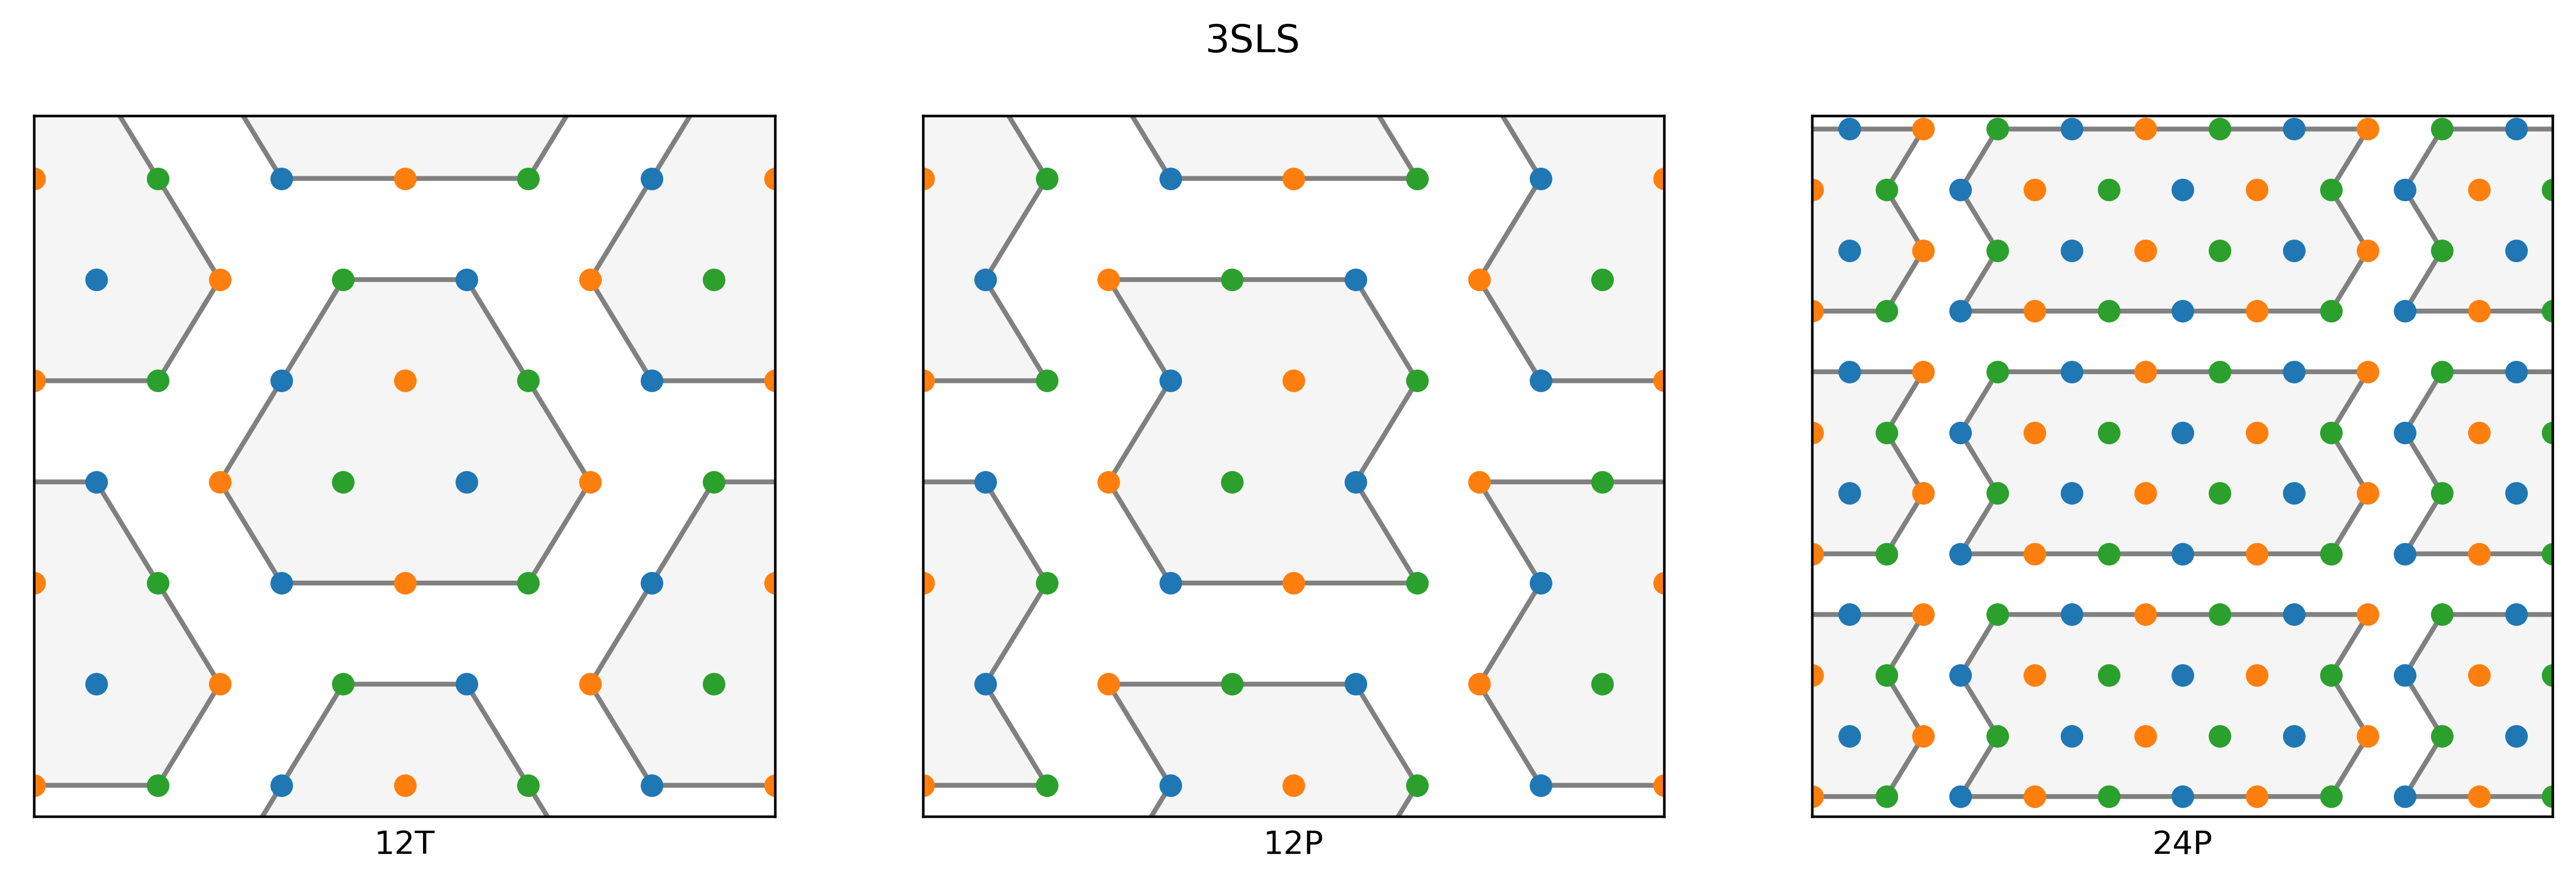

In [2]:
def plot_plaq(plaq, colors=None, markers=None):
    R1 = plaq['Rs'][0]
    R2 = plaq['Rs'][1]
    Rs = [np.zeros(2), R1, R2, -R1, -R2, R1-R2, -R1+R2, R1+R2, -R1-R2]
    if colors is None:
        colors = ['black' for r in plaq['rs']]
    if markers is None:
        markers = ['o' for r in plaq['rs']]
    for R in Rs:
        outline_rs = [plaq['rs'][o]+R for o in plaq['outline']]
        plt.plot([r[0] for r in outline_rs],
                 [r[1] for r in outline_rs], color='gray', zorder=0)
        plt.fill([r[0] for r in outline_rs],
                 [r[1] for r in outline_rs], color='whitesmoke', zorder=-1)
        for i, r in enumerate(plaq['rs']):
            ri = r + R
            plt.scatter(*ri, color=colors[i], marker=markers[i])
            # plt.text(*ri, i, clip_on=True)
            
plt.figure(figsize=(14,4), dpi=400)
plt.subplot(1,3,1)
colors = [dcolors[0], dcolors[1], dcolors[2],
          dcolors[1], dcolors[2], dcolors[0], dcolors[1],
          dcolors[0], dcolors[1], dcolors[2],
          dcolors[2], dcolors[0]]
markers = ['^', 'v', '^',
           '>', '<', '>', '<',
           'v', '^', 'v',
           '>', '<']
plot_plaq(plaq12, colors=colors, markers=None)
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.xticks([])
plt.yticks([])
plt.xlabel('12T')

plt.subplot(1,3,2)
colors = [dcolors[0], dcolors[1], dcolors[2],
          dcolors[1], dcolors[2], dcolors[0],
          dcolors[0], dcolors[1], dcolors[2],
          dcolors[1], dcolors[2], dcolors[0]]
markers = ['^', 'v', '^',
           '>', '<', '>',
           'v', '^', 'v',
           '<', '>', '<']
plot_plaq(plaq12A, colors=colors, markers=None)
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.xticks([])
plt.yticks([])
plt.xlabel('12P')

plt.subplot(1,3,3)
colors = [dcolors[0], dcolors[1], dcolors[2], dcolors[0], dcolors[1], dcolors[2],
          dcolors[2], dcolors[0], dcolors[1], dcolors[2], dcolors[0], dcolors[1],
          dcolors[0], dcolors[1], dcolors[2], dcolors[0], dcolors[1], dcolors[2],
          dcolors[2], dcolors[0], dcolors[1], dcolors[2], dcolors[0], dcolors[1]]
markers = ['^', 'v', '^', 'v', '^', 'v',
           '<', '>', '<', '>', '<', '>',
           'v', '^', 'v', '^', 'v', '^',
           '>', '<', '>', '<', '>', '<']
plot_plaq(plaq24A, colors=colors, markers=None)
plt.xlim(-2, 8)
plt.ylim(-3.75,6.25)
plt.xticks([])
plt.yticks([])
plt.xlabel('24P')

plt.suptitle('3SLS')
plt.savefig('clusters_3SLS.pdf', bbox_inches='tight')

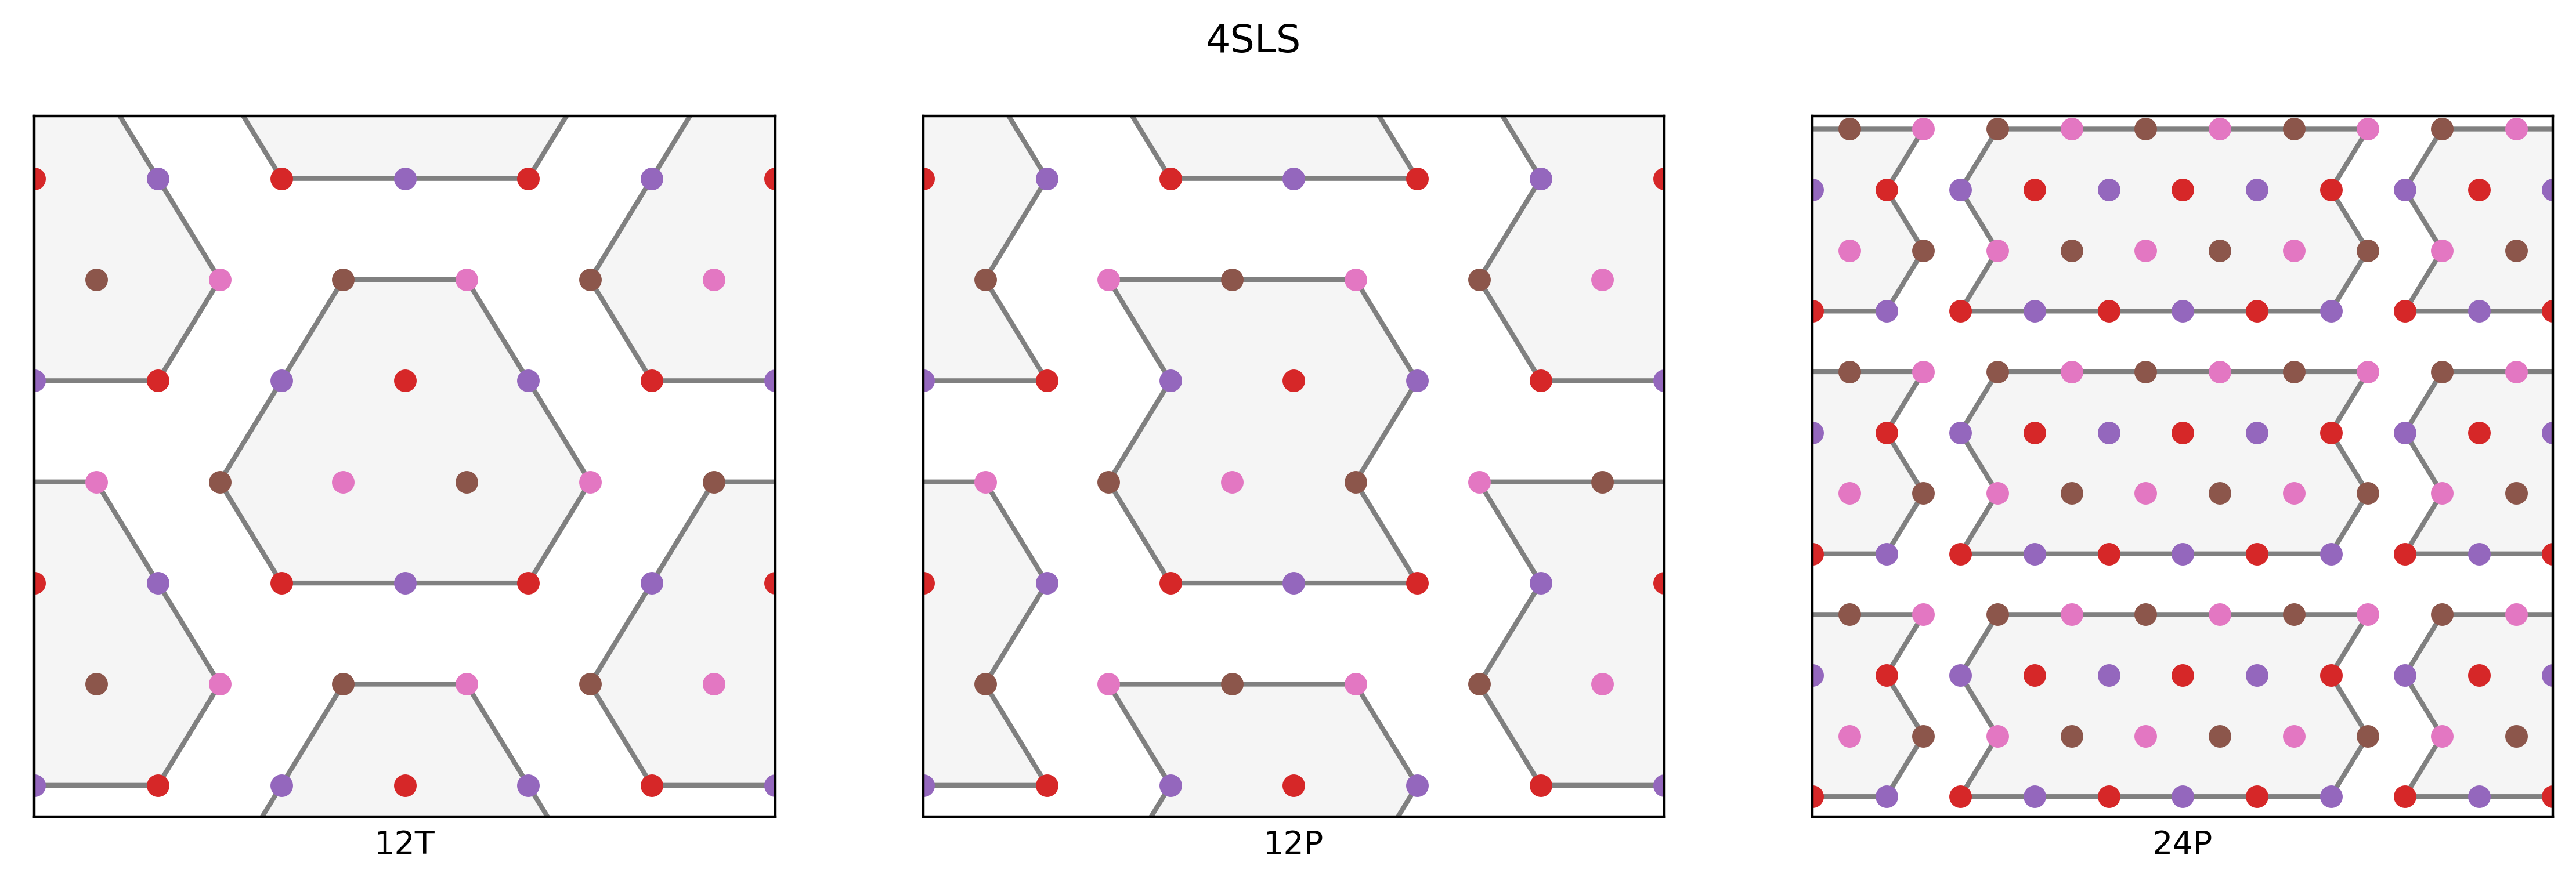

In [3]:
plt.figure(figsize=(14,4), dpi=400)
plt.subplot(1,3,1)
colors = [dcolors[3], dcolors[4], dcolors[3],
           dcolors[5], dcolors[6], dcolors[5], dcolors[6],
           dcolors[4], dcolors[3], dcolors[4],
           dcolors[5], dcolors[6]]
plot_plaq(plaq12, colors=colors, markers=None)
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.xticks([])
plt.yticks([])
plt.xlabel('12T')

plt.subplot(1,3,2)
colors = [dcolors[3], dcolors[4], dcolors[3],
           dcolors[5], dcolors[6], dcolors[5],
           dcolors[4], dcolors[3], dcolors[4],
           dcolors[6], dcolors[5], dcolors[6]]
plot_plaq(plaq12A, colors=colors, markers=None)
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.xticks([])
plt.yticks([])
plt.xlabel('12P')

plt.subplot(1,3,3)

colors = [dcolors[3], dcolors[4], dcolors[3], dcolors[4], dcolors[3], dcolors[4],
           dcolors[6], dcolors[5], dcolors[6], dcolors[5], dcolors[6], dcolors[5],
           dcolors[4], dcolors[3], dcolors[4], dcolors[3], dcolors[4], dcolors[3],
           dcolors[5], dcolors[6], dcolors[5], dcolors[6], dcolors[5], dcolors[6]]
plot_plaq(plaq24A, colors=colors, markers=None)
plt.xlim(-2, 8)
plt.ylim(-3.75,6.25)
plt.xticks([])
plt.yticks([])
plt.xlabel('24P')

plt.suptitle('4SLS')
plt.savefig('clusters_4SLS.pdf', bbox_inches='tight')

In [56]:
def mf3(plaq):
    mf = {'x': np.zeros(12),
          'y': np.zeros(12),
          'z': np.zeros(12)}
    if plaq == plaq12:
        SL3 = [[0,5,7,11],
               [1,6,8,3],
               [2,4,9,10]]
    else:
        SL3 = [[0,5,6,11],
               [1,3,7,9],
               [2,4,8,10]]
    # some orientation with 120^o relative in the x-y plane
    mf['x'][SL3[0]] = 1
    mf['y'][SL3[0]] = 0
    mf['x'][SL3[1]] = -0.5
    mf['y'][SL3[1]] = 0.5*np.sqrt(3) 
    mf['x'][SL3[2]] = -0.5
    mf['y'][SL3[2]] = -0.5*np.sqrt(3)
    return mf

def mf4(plaq):
    mf = {'x': np.zeros(12),
          'y': np.zeros(12),
          'z': np.zeros(12)}
    if plaq == plaq12:
        SL4 = [[0,2,8], [1,7,9], [3,5,10], [4,6,11]]
    else:
        SL4 = [[0,2,7], [1,6,8], [3,10,5], [4,9,11]]
    mf['x'][SL4[0]] = 1
    mf['x'][SL4[1]] = 1
    mf['x'][SL4[2]] = -1
    mf['x'][SL4[3]] = -1
    return mf

In [57]:
steps = 30
basis = spin_basis_1d(12, pauli=0)
interactions = {'n_bonds': {'xx': 1., 'yy': 1., 'zz': 1.},
                'nn_bonds': {'xx': 1., 'yy': 1., 'zz': 1.}}

ET = np.zeros((steps, 2))
cvgT = np.zeros((steps, 2))
VTs = np.zeros((steps, basis.Ns, 2), dtype=np.complex128)
vT = None
J1 = 1
J2s = np.linspace(0, .35, steps)

In [58]:
mfT = mf3(plaq12)
for i, J2 in enumerate(tqdm(J2s)):
    if i == 0:
        mf_cvg = True
    else:
        mf_cvg = False
    interactions = {'n_bonds': {'xx': J1, 'yy': J1, 'zz': J1},
                    'nn_bonds': {'xx': J2, 'yy': J2, 'zz': J2}}
    ET[i,0], vT, mfT, cvgT[i,0] = do_hmft(plaq12, interactions, basis, mf0=mfT, v0=vT, lanczos_tol=10**-12, hmft_tol=10**-9,
                                          mf_cvg=mf_cvg, max_iter=100)
    VTs[i,:, 0] = vT

100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


In [59]:
mfT = mf4(plaq12)
mfA = None
mfB = None
for i, J2 in enumerate(tqdm(J2s[::-1])):
    if i == 0:
        mf_cvg = True
    else:
        mf_cvg = False
    j = steps-1-i
    interactions = {'n_bonds': {'xx': J1, 'yy': J1, 'zz': J1},
                    'nn_bonds': {'xx': J2, 'yy': J2, 'zz': J2}}
    ET[j,1], vT, mfT, cvgT[j,1] = do_hmft(plaq12, interactions, basis, mf0=mfT, v0=vT, lanczos_tol=10**-12, hmft_tol=10**-9,
                                          mf_cvg=mf_cvg, max_iter=100)
    VTs[j,:,1] = vT

100%|██████████| 30/30 [00:29<00:00,  1.03it/s]


In [60]:
E = np.min([ET[:,0], ET[:,1]], axis=0)
inds = np.argmin([ET[:,0], ET[:,1]+10**-6], axis=0)
VS = [VTs[i,:,ind] for i, ind in enumerate(inds)]

In [62]:
A = [0,5,7,11]
B = [1,3,6,8]
C = [2,4,9,10]
m120_lst = [['x', [[1, i] for i in A]],
            ['x', [[-.5, i] for i in B+C]],
            ['y', [[.5*np.sqrt(3), i] for i in B]],
            ['y', [[-.5*np.sqrt(3), i] for i in C]]]
m120_op = quantum_operator({'static': m120_lst}, basis=basis, check_symm=False, check_herm=False)

U = [0, 2, 8]
V = [1, 7, 9]
X = [3, 5, 10]
Y = [4, 6, 11]
ms_lst = [['x', [[1, i] for i in U+V]],
          ['x', [[-1, i] for i in X+Y]]]
ms_op = quantum_operator({'static': ms_lst}, basis=basis, check_symm=False, check_herm=False)

In [63]:
m120s = np.zeros(steps)
mss = np.zeros(steps)
for i in range(steps):
    m120s[i] = np.real(m120_op.expt_value(VS[i]))/12
    mss[i] = np.real(ms_op.expt_value(VS[i]))/12

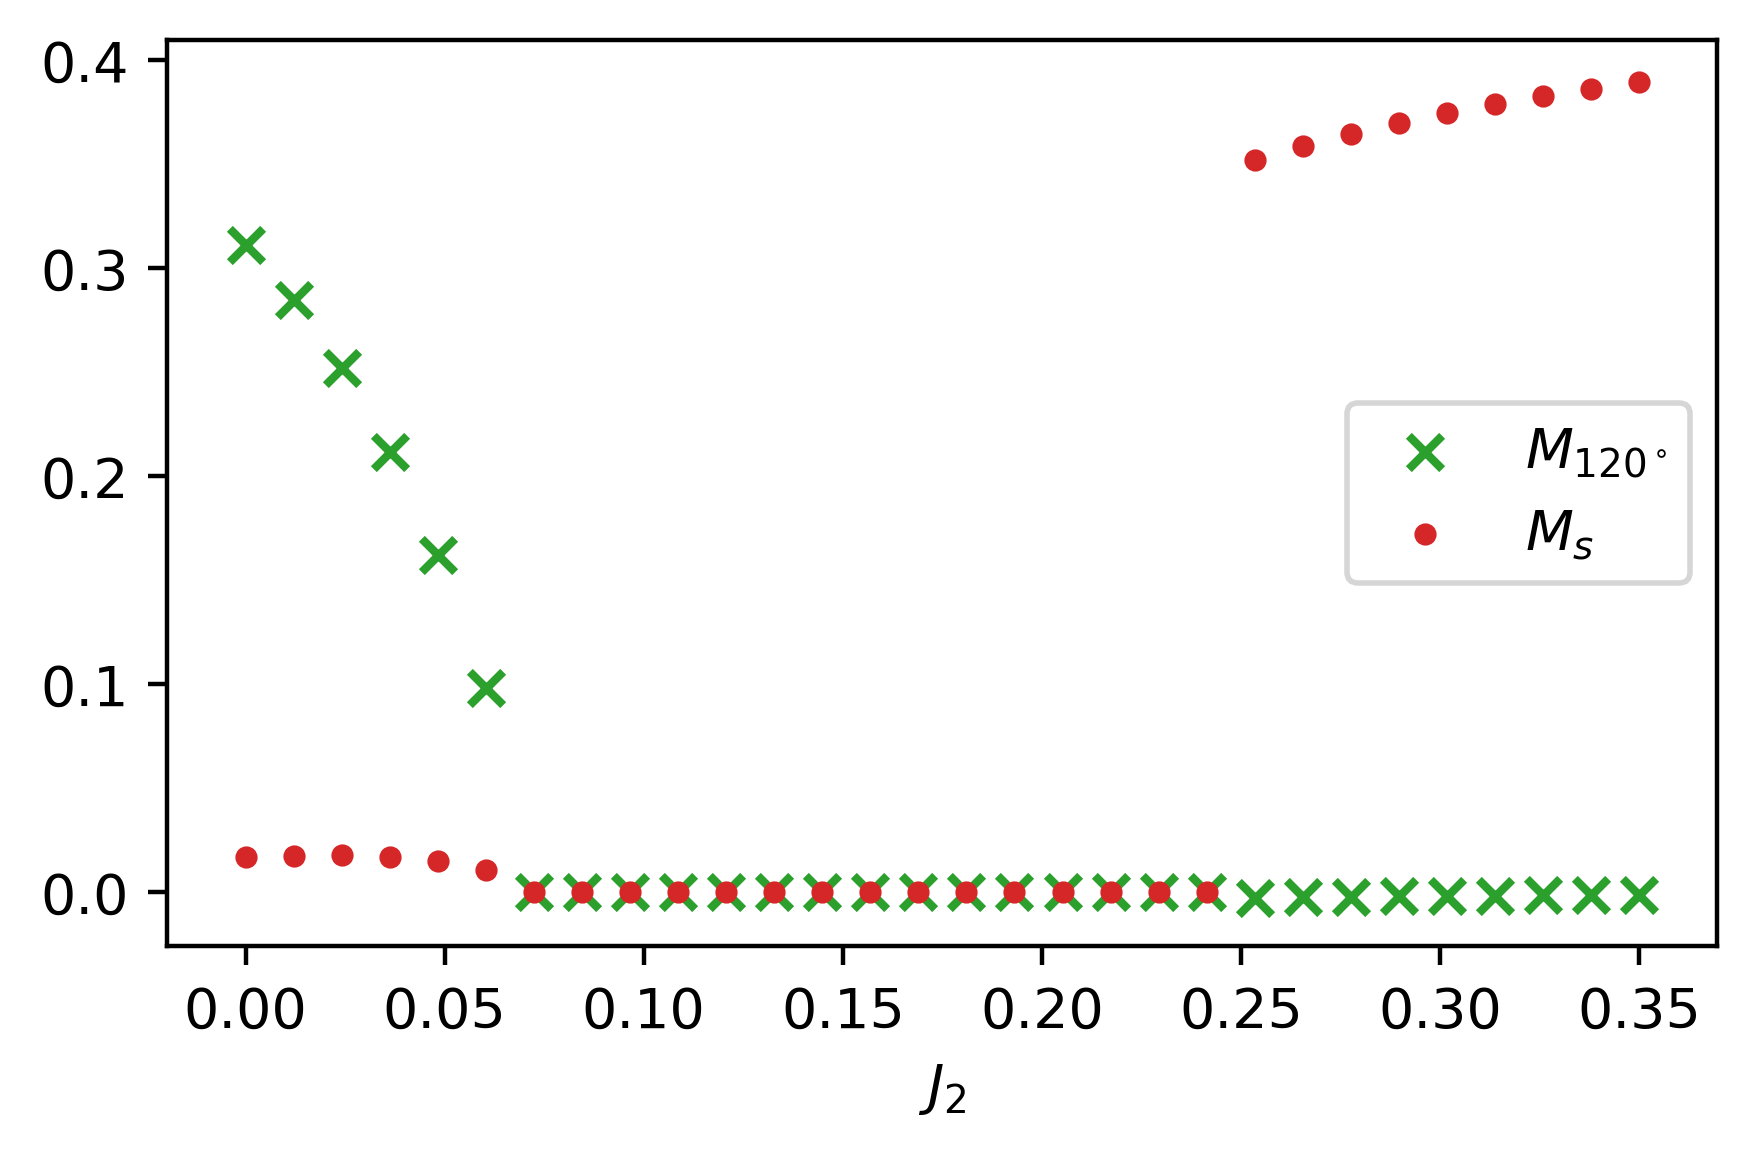

In [74]:
plt.figure(figsize=(5,3), dpi=400)
plt.scatter(J2s, m120s, marker='x', label='$M_{120^\circ}$', color=dcolors[2])
plt.scatter(J2s, mss, marker='.', label='$M_s$', color=dcolors[3])
plt.xlabel(r'$J_2$')
plt.legend()
plt.savefig('magnetizations.pdf', bbox_inches='tight')

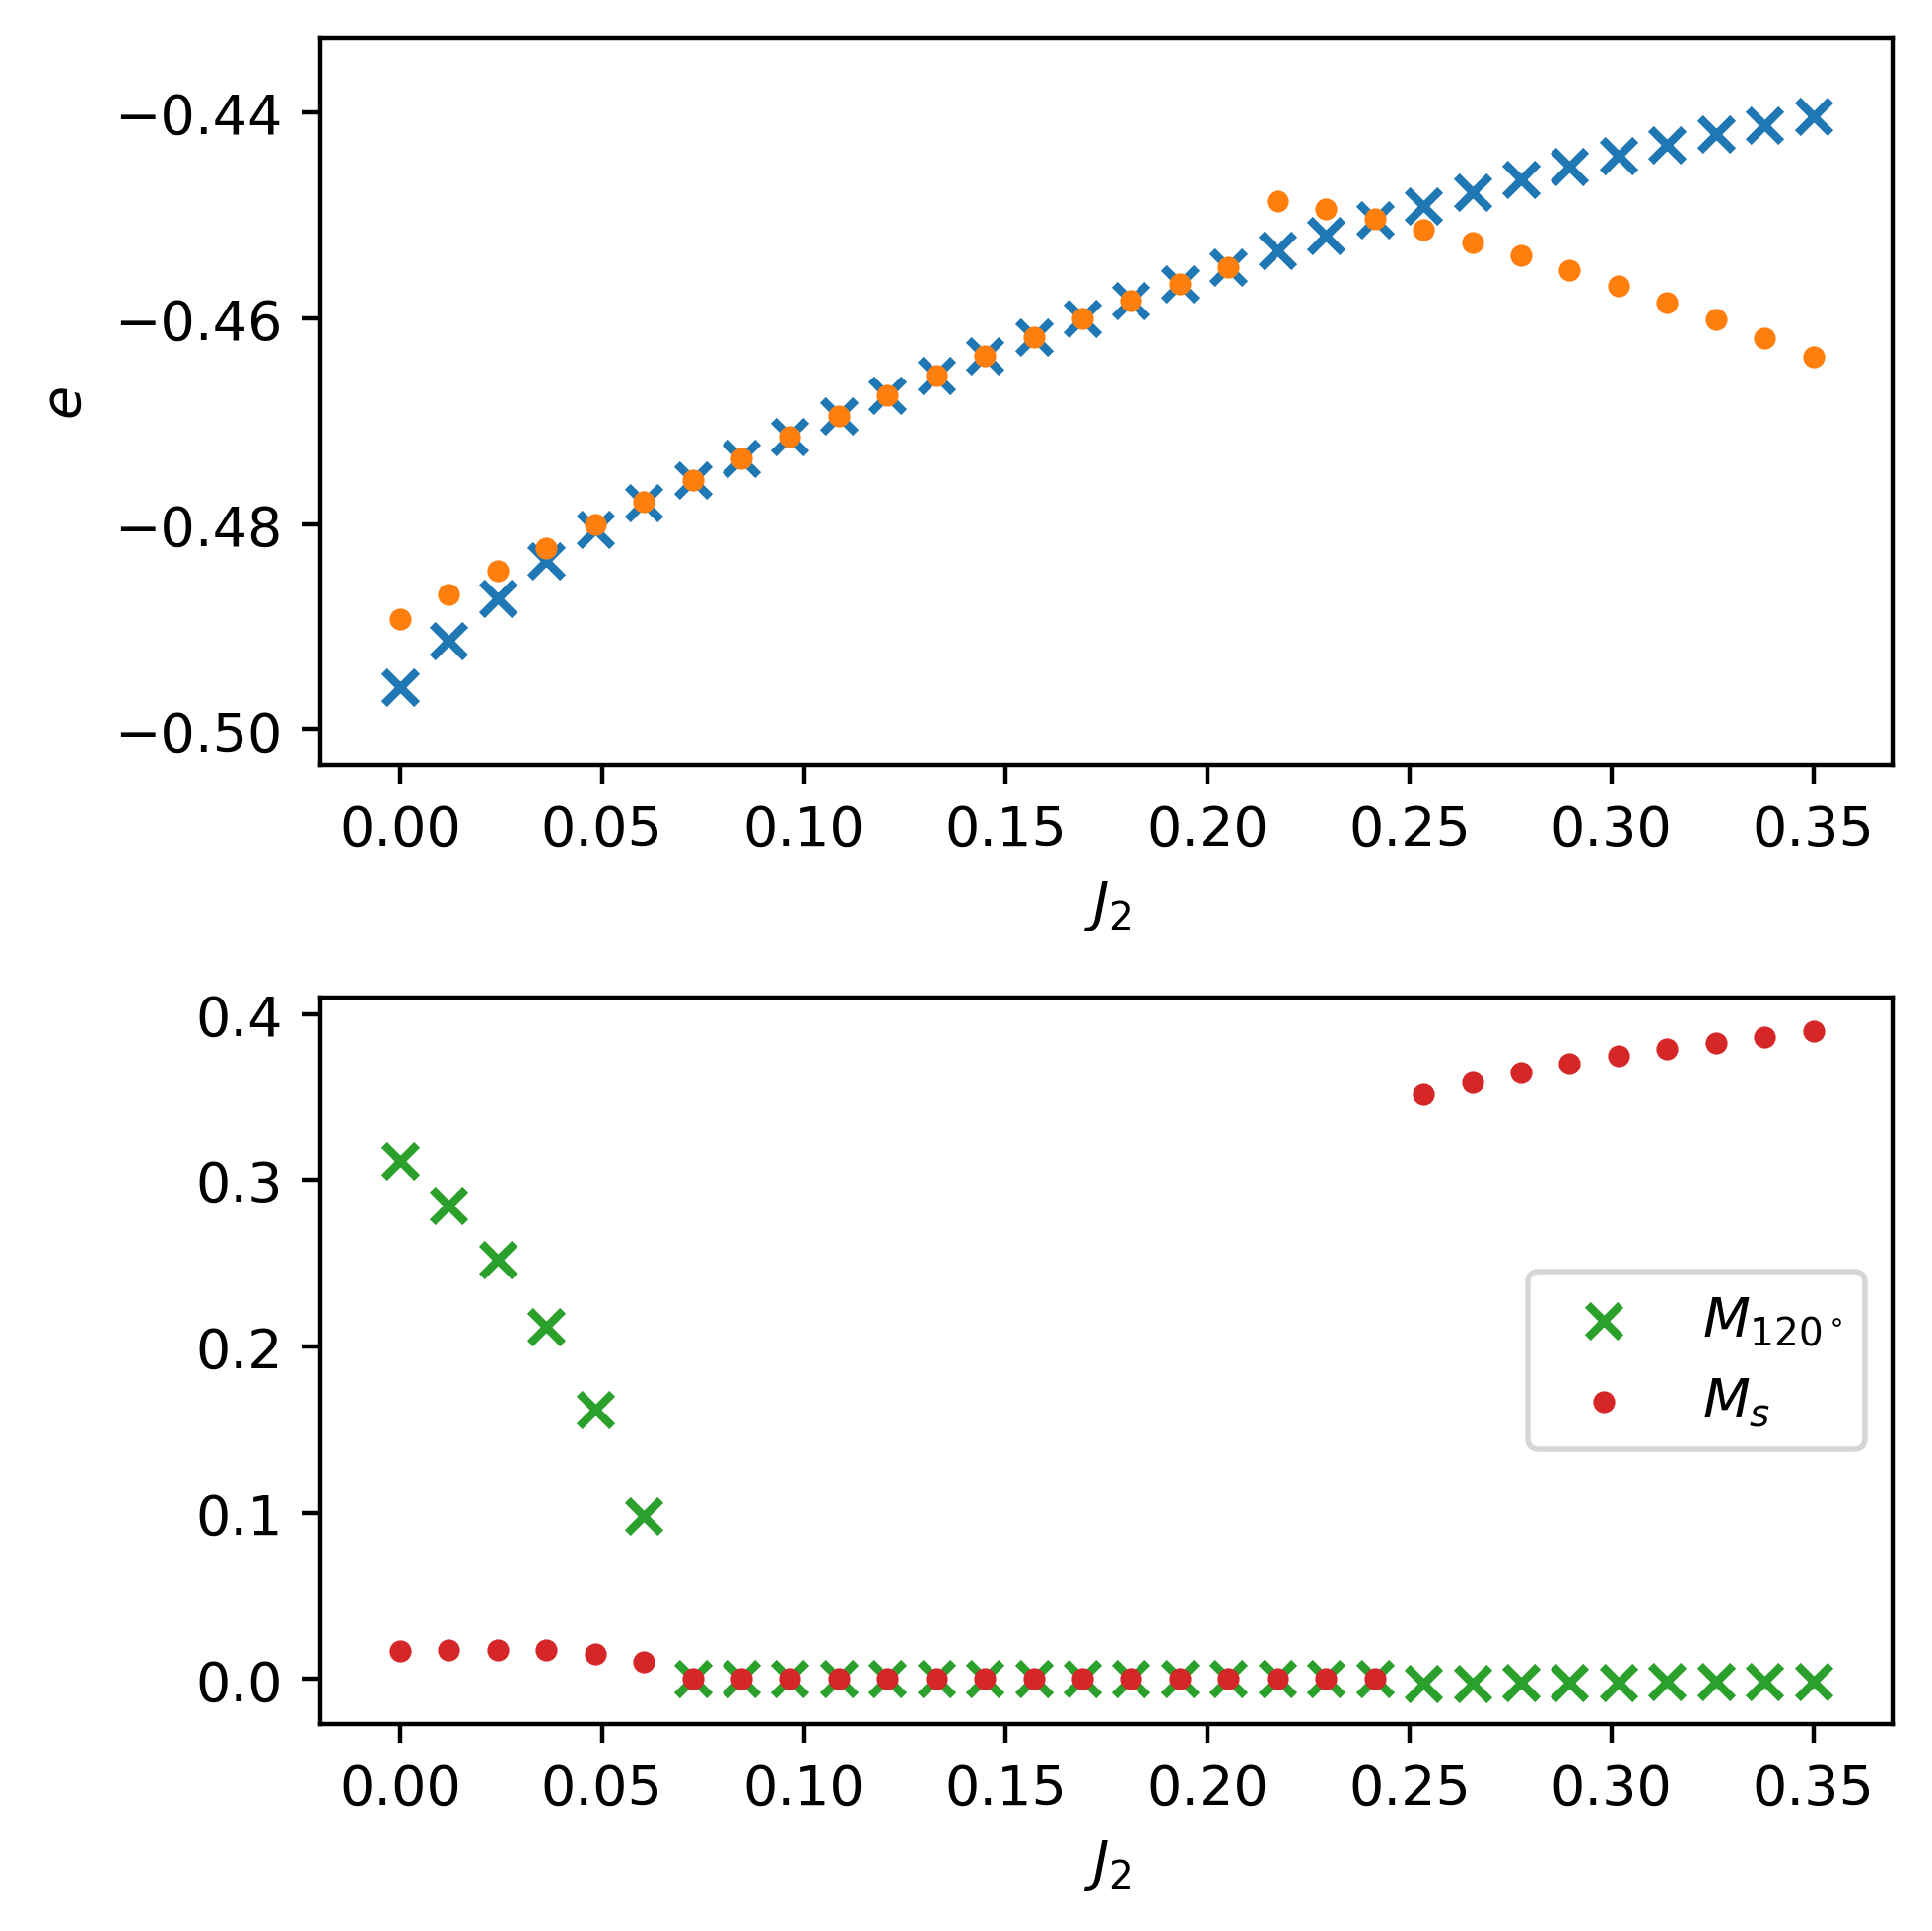

In [97]:
plt.figure(figsize=(5,5), dpi=400)
dJ = J2s[1]-J2s[0]
plt.subplot(2,1,1)
plt.scatter(J2s, ET[:,0]/12, marker='x', label='Left to right')
plt.scatter(J2s, ET[:,1]/12, marker='.', label='Right to left')
plt.xlabel(r'$J_2$')
plt.ylabel(r'$e$')
plt.subplot(2,1,2)
plt.scatter(J2s, m120s, marker='x', label='$M_{120^\circ}$', color=dcolors[2])
plt.scatter(J2s, mss, marker='.', label='$M_s$', color=dcolors[3])
plt.xlabel(r'$J_2$')
plt.legend()
plt.tight_layout()
plt.savefig('heisenberg_results.pdf', bbox_inches='tight')